# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [98]:
import pandas as pd
import numpy as np

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [99]:
temp=pd.read_csv('../Temp_states.csv')

temp.head(10)


,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Print `temp`.

In [100]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [101]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [102]:
"""
Out of 3 columns, 2 are objects and Temperatures are float
"""

'\nOut of 3 columns, 2 are objects and Temperatures are float\n'

#### Select the rows where state is New York.

In [103]:
NY=temp[temp.State.isin(['New York'])]
NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average temperature of cities in New York?

In [104]:
NY['Temperature'].mean()

10.74074074074074

#### Which states and cities have a temperature above 15 degrees Celsius?

In [105]:
temp15=temp[temp['Temperature']>15]
temp15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [106]:
temp15['City'].to_frame()

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [107]:
temp15_20=temp[(temp['Temperature']<20)&(temp['Temperature']>15)]
temp15_20


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and standard deviation of the temperature of each state.

In [108]:
temp.groupby('State', as_index=False)['Temperature'].mean()
# temp.groupby('State', as_index=False)['Temperature'].std()



,State,Temperature
0,Connecticut,15.833333
1,New Jersey,21.111111
2,New York,10.740741


# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [109]:
employees=pd.read_csv('../employees.csv')
employees

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52
3,Admin,Master,VP,Manuella,15,33
4,Sales,Master,Analyst,Carla,6,38
...,...,...,...,...,...,...
495,Sales,PhD,VP,Calvin,2,119
496,HR,Master,Analyst,Dustin,6,67
497,Sales,PhD,VP,Winston,13,93
498,IT,PhD,Analyst,Earl,12,108


#### Explore the data types of the `employees` dataframe. Comment your results.

In [110]:
employees.dtypes

Department    object
Education     object
Title         object
Name          object
Years          int64
Salary         int64
dtype: object

In [111]:
"""
Except for 'Years' and 'Salary', rest are objects.
"""

"\nExcept for 'Years' and 'Salary', rest are objects.\n"

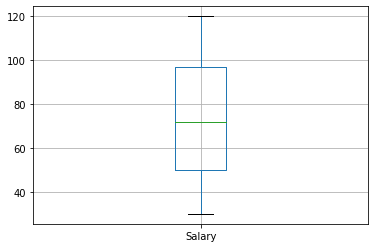

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

employees.boxplot(column='Salary')

In [113]:
import plotly.express as px
px.box(employees,y='Salary')

## Use seaborn boxplot to show the salary distribution across job titles

[Text(0, 0, 'associate'), Text(0, 0, 'VP'), Text(0, 0, 'Analyst')]

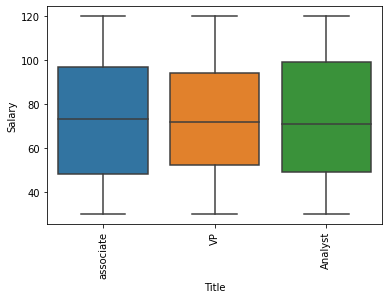

In [118]:
import seaborn as sns
DV=sns.boxplot(x='Title',y='Salary',data=employees)
DV.set_xticklabels(DV.get_xticklabels(),rotation=90)

## Make the seaborn more interative + plotly express

In [120]:
import seaborn as sns
import plotly.express as px

px.box(employees,x='Title',y='Salary')

## px.box to show the relations between 三个因素的比较salary, title and education，另一个用颜色区分

In [123]:
'''
It shows that most employees with PhD don't earn more than Masters and Bachelors 
'''

px.box(employees,x='Title',y='Salary',color='Education')



## 3个因素的互相比较， education, department, salary

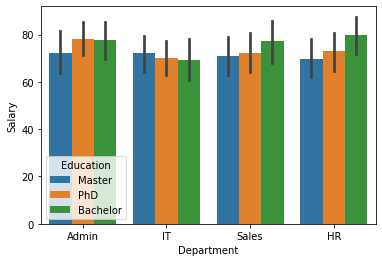

In [129]:
# department and average salary

# employees.groupby('Department', as_index=False)['Salary'].mean().plot.bar()

dep=sns.barplot(x='Department',y='Salary',hue='Education',data=employees)
# Dep.hist()

#### What's the average salary in this company?

In [116]:
employees['Salary'].mean()

73.528

#### What's the highest salary?

In [67]:
employees['Salary'].max()

120

#### What's the lowest salary?

In [68]:
employees['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [74]:
employees.nsmallest(10, 'Salary')   #  persons with the lowest sarlies

,Department,Education,Title,Name,Years,Salary
27,IT,Bachelor,Analyst,Sean,12,30
106,Admin,Bachelor,associate,Luke,4,30
128,Sales,PhD,VP,Adam,8,30
139,Sales,PhD,Analyst,Rick,11,30
214,Sales,Master,VP,Neil,11,30
266,HR,PhD,associate,Marcel,10,30
452,IT,Bachelor,Analyst,Augustin,13,30
47,Admin,Bachelor,VP,Melissa,8,31
124,IT,Bachelor,VP,David,3,31
243,HR,PhD,associate,Chad,5,31


#### Find all the information about an employee called David.

In [81]:
D=employees[employees['Name']=='David']
D

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
124,IT,Bachelor,VP,David,3,31


#### Could you return only David's salary?

In [94]:
D['Salary'].to_frame()

,Salary
0,58
124,31


#### Print all the rows where job title is associate.

In [96]:
A=employees[employees.Title.isin(['associate'])]
A


,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52
7,HR,Master,associate,Carol,14,53
8,Admin,PhD,associate,Jean,8,50
...,...,...,...,...,...,...
477,HR,PhD,associate,Phillip,11,113
486,IT,Bachelor,associate,Jay,14,58
487,HR,Master,associate,Patricia,10,110
491,Admin,PhD,associate,Alice,8,37


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [ ]:
# Method 1
# your code here

In [ ]:
# Method 2
# your code here

#### Find the employees whose title is associate and whose salary is above 55.

In [ ]:
# your code here

#### Group the employees by number of years of employment. What are the average salaries in each group?

In [ ]:
# your code here

####  What is the average salary per title?

In [ ]:
# your code here

####  Find the salary quartiles.


In [ ]:
# your code here

#### Is the mean salary different per gender?

In [ ]:
# your code here

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [ ]:
# your code here

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [ ]:
# your code here

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [ ]:
# your code here

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

####  What is the average purchase price?

In [ ]:
# your code here

#### What are the highest and lowest purchase prices? 

In [ ]:
# your code here

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [ ]:
# your code here

#### How many customers do we have in Spain?

In [ ]:
# your code here

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [ ]:
# your code here

#### Select orders from Spain that include more than 50 items.

In [ ]:
# your code here

#### Select all free orders.

In [ ]:
# your code here

#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [ ]:
# your code here

#### Select all `lunch bag` orders made in 2011.

In [ ]:
# your code here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your code here

#### Select all orders made in the month of August.

In [ ]:
# your code here

#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [ ]:
# your code here

#### What's the  average amount of money spent by country?

In [ ]:
# your code here

#### What's the most expensive item?

In [ ]:
# your code here

#### What is the average amount spent per year?

In [ ]:
# your code here